In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('GEOS-CF_AirQuality_20180101_0030z.nc4')

In [3]:
O3 = ds.O3

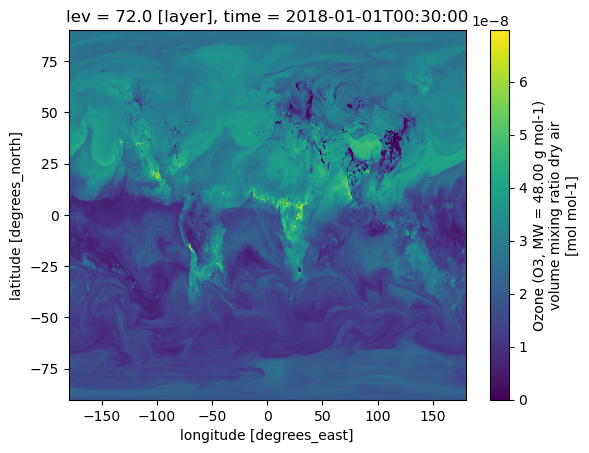

In [6]:
O3.plot()

In [7]:
O3 = ds.O3 * 1e9 # convert to ppb

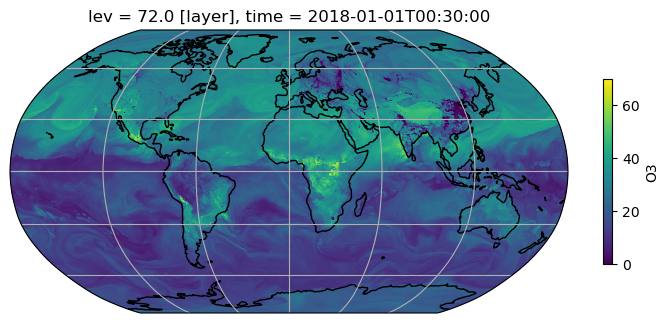

In [8]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
O3.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.4}) # This line just makes the axis smaller
ax.coastlines()
ax.gridlines()

In [10]:
max = O3.max()

In [16]:
O3.where(O3==max, drop=True).squeeze()

<xarray.DataArray 'O3' ()>
array(69.73278, dtype=float32)
Coordinates:
    lon      float64 -118.8
    lat      float64 34.5
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

#### a. Where is O3 qualitatively high?
Qualitatively, O3 is higher in the Northern Hemisphere than the Southern Hemispheres because the Northern Hemisphere has more light green and yellow areas (>40 ppb). For some general locations, O3 is high in parts of Mexico, western U.S., central Africa, central South America, and off the coast of India.
#### b. What latitude and longitude is O3 highest?
The latitude and longitude where O3 is highest is (34.5, -118.8).

In [17]:
min = O3.min()

In [23]:
O3.where(O3==min, drop=True).squeeze()

<xarray.DataArray 'O3' (lat: 4, lon: 8)>
array([[nan, nan, nan, nan, nan,  0.,  0., nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.],
       [ 0., nan,  0.,  0.,  0., nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

#### c. Where is O3 qualitatively low?
Qualitatively, O3 is lower in the Southern Hemisphere than the Northern Hemispheres because the Southern Hemisphere is mostly dark blue (<20 ppb). For some general locations, O3 is low in most of the southern oceans and in parts of eastern China, western Russia, and northern South America.
#### d. What latitude and longitude is O3 lowest?
There are multiple locations where O3 is at 0 ppb. The latitudes are , , ,  adnnd the longitudes are  longitudes are 38.5, 38.75, 39, 39.25, 39.5, 73.25, 73.5, 73.75.

In [34]:
O3.sel(lat=34.082050710168, lon=-118.33694776488198, method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1)>
array([[45.401974]], dtype=float32)
Coordinates:
    lon      float64 -118.2
    lat      float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

#### e. What is the O3 concentration over LA?
For the coordinate (34.082050710168,-118.33694776488198) which is near central LA, the O3 concentration is 45.401974 ppb.

In [33]:
O3.sel(lat=21.48885027769929, lon=-157.9998367372418, method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1)>
array([[36.612617]], dtype=float32)
Coordinates:
    lon      float64 -158.0
    lat      float64 21.5
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

#### f. What is the O3 concentration over Hawaii?
For the coordinate (21.48885027769929,-157.9998367372418) which is in Honolulu, the O3 concentration is 36.612617 ppb.

# Final Project Pitch

i. For my project, I want to work with PM2.5 data from BEACO2N sensors located around LA. Aside from PM2.5, I will also be using relative humidity and absolute humidity data from the BEACO2N sensors, as well as temperature and wind speed and direction data from ERA5 reanalysis. The data will be hourly over the course of the year 2022, so I'm expecting around 8760 (or less to account for missing measurements) rows for each variable. I will pick one location to begin, but may include more if I have time.

ii. I would like to perform some regression analysis to answer a few questions. </br>
Question 1: How well can I predict the next day's PM2.5 using the PM2.5 and meteorological conditions data from the previous day? </br>
Question 2: Which meteorological variable can best predict PM2.5?

iii. As the sensors are located at schools, the forecasting would give teachers and administrators a heads-up about the following day's PM conditions and implement alternative plans for recess or outdoor activities if needed. The BEACO2N sensors are also relatively inexpensive and its data is publicly accessible, so this process could be done by the school themselves or by anyone who lives near one of the locations and is concerned about air quality. This could make air monitoring and prediction more accessible and local.